In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
raw_data = pd.read_csv('train.csv', index_col='PassengerId')

In [10]:
raw_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
raw_data['Sex'] = raw_data['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [13]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
raw_data['relatives']= raw_data['SibSp'] + raw_data['Parch']

In [15]:
raw_data.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [16]:
raw_data.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


In [17]:
raw_data['Age'].fillna(0,inplace=True)

In [18]:
raw_data.isnull().values.any()

True

In [19]:
y_train = raw_data['Survived']

In [20]:
x_train = raw_data[['Pclass','Sex','Age','Fare','relatives']]

In [21]:
x_train.head(2)

,Pclass,Sex,Age,Fare,relatives
PassengerId,,,,,
1,3,0,22.0,7.2500,1
2,1,1,38.0,71.2833,1


In [22]:
y_train = np.array(y_train).reshape(-1,1)


In [23]:
x_train = np.array(x_train).reshape(-1,5)
x_train

array([[ 3.    ,  0.    , 22.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    ,  0.    , 23.45  ,  3.    ],
       [ 1.    ,  0.    , 26.    , 30.    ,  0.    ],
       [ 3.    ,  0.    , 32.    ,  7.75  ,  0.    ]])

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(x_train)

StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)

In [27]:
x_train = np.concatenate((np.ones((len(y_train),1)),x_train),axis=1)

In [28]:
x_train

array([[ 1.        ,  0.82737724, -0.73769513, -0.10231279, -0.50244517,
         0.05915988],
       [ 1.        , -1.56610693,  1.35557354,  0.80749164,  0.78684529,
         0.05915988],
       [ 1.        ,  0.82737724,  1.35557354,  0.12513832, -0.48885426,
        -0.56097483],
       ...,
       [ 1.        ,  0.82737724,  1.35557354, -1.35329389, -0.17626324,
         1.29942929],
       [ 1.        , -1.56610693, -0.73769513,  0.12513832, -0.04438104,
        -0.56097483],
       [ 1.        ,  0.82737724, -0.73769513,  0.46631498, -0.49237783,
        -0.56097483]])

Logistic Regression

In [29]:
theta = np.array([1,1,1,1,1,1]).reshape(-1,1)
theta

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [31]:
def H_X(x,theta):
    h_x = x.dot(theta)
    h_x = [sigmoid(element) for element in h_x ]
    return np.array(h_x).reshape(-1,1)

In [32]:
def compute_cost(x,y,theta):
    h_x = H_X(x,theta)
    ones = np.ones((len(y),1))
    
    J = (-1/(len(y))) * ((np.log(h_x )).T.dot(y) +  (np.log(ones - h_x)).T.dot(ones - y))
    return J

In [33]:
ctest = compute_cost(x_train,y_train,theta)
ctest

array([[0.99135644]])

In [34]:
def gradient_descent(x,y,theta,iteration,alpha):
    J_hist = []
    
    print('descent started')
    for i in range(iteration):
        J_hist.append(compute_cost(x,y,theta))
        h_x = H_X(x,theta)
        theta = theta - (alpha/len(y)) * (x.T.dot((h_x - y)))
    print('descent finished')
    return theta, np.array(J_hist).reshape(-1,1)

In [35]:
def result(x,theta):
    h_x = H_X(x,theta)
    y = []
    for i in range(len(x)):
        if h_x[i][0] >= 1/2:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

In [36]:
f_theta, j_history = gradient_descent(x_train,y_train,theta,10000,0.1)

descent started
descent finished


In [37]:
f_theta

array([[-0.63107932],
       [-0.81997405],
       [ 1.32246464],
       [-0.29303137],
       [ 0.16173231],
       [-0.30752967]])

In [38]:
j_history

array([[0.99135644],
       [0.97868686],
       [0.96634384],
       ...,
       [0.45335441],
       [0.45335441],
       [0.45335441]])

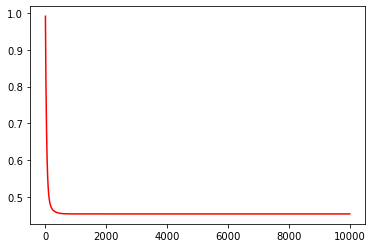

In [39]:
plt.plot(list(range(1,10001)),j_history,color = 'red')


In [40]:
test_data = pd.read_csv('test.csv')

In [41]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [43]:
test_data['relatives'] = test_data['SibSp'] + test_data['Parch']

In [44]:
test_data.drop(['SibSp','Parch'],axis = 1,inplace=True)

In [45]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
0,892,3,"Kelly, Mr. James",0,34.5,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,NaN,S,2


In [46]:
test_data['Age'].fillna(0,inplace=True)

In [47]:
x_test = test_data[['Pclass','Sex','Age','Fare','relatives']]

In [48]:
x_test = np.array(x_test).reshape(-1,5)

In [49]:
x_test.shape

(418, 5)

In [50]:
x_test = scaler.fit_transform(x_test)

In [51]:
x_test = np.concatenate((np.ones((418,1)),x_test),axis=1)

In [52]:
x_test

array([[ 1.        ,  0.87348191, -0.75592895,  0.59480137, -0.49781052,
        -0.5534426 ],
       [ 1.        ,  0.87348191,  1.32287566,  1.30589556, -0.51265996,
         0.10564289],
       [ 1.        , -0.31581919, -0.75592895,  2.15920859, -0.46453181,
        -0.5534426 ],
       ...,
       [ 1.        ,  0.87348191, -0.75592895,  0.82235151, -0.50818292,
        -0.5534426 ],
       [ 1.        ,  0.87348191, -0.75592895, -1.3678186 , -0.4938564 ,
        -0.5534426 ],
       [ 1.        ,  0.87348191, -0.75592895, -1.3678186 , -0.23762123,
         0.76472838]])

In [53]:
result_y = result(x_test,f_theta)

In [54]:
result_y = result_y.reshape(-1,1)

In [55]:
result_passengerid = np.array(test_data['PassengerId']).reshape(-1,1)

In [56]:
result_matrix = np.concatenate((result_passengerid,result_y),axis=1)

In [57]:
result_df = pd.DataFrame(result_matrix,columns=['PassengerId','Survived'])

In [58]:
result_df.to_csv('send_result',index=False)

In [59]:
####After submittinf the result on kaggle i got a score of 0.76555

Support Vector Machine


In [60]:
raw_data['Survived']= raw_data['Survived'].apply(lambda x: -1 if x==0 else 1)

In [61]:
y_t = np.array(raw_data['Survived']).reshape(-1,1)

In [62]:
def comp_cost(X,Y,W,C=10000):
    #calculating hinge loss:
    dist = np.ones((len(Y),1)) * np.dot(X,W)
    dist[dist<0] = 0
    hingeloss = C * np.sum(dist)/len(Y)
    #calculating cost:
    cost = 1/2 * np.dot(W.T , W) + hingeloss
    return int(cost)

In [113]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    distance = ( 1 - (Y_batch * np.dot(X_batch, W))).flatten()
    dw = np.zeros(len(W)).reshape(-1,1) 
    W=W.reshape(-1,1)
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind:ind+1,:])
        dw += di    
    dw = dw/len(Y_batch)  
    return dw

In [114]:
def bgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    cost_hist = []
    # stochastic gradient descent
    for epoch in range(1, max_epochs): 
        # shuffle to prevent repeating update cycles
        
        cost_hist.append(comp_cost(features,outputs,weights,C=10000))
        
        ascent = calculate_cost_gradient(weights, features,outputs )
        weights = weights - (learning_rate * ascent)
            
    return weights, cost_hist

In [115]:
learning_rate = 0.0001

In [116]:
reg_strength = 10000

In [117]:
final_w, cost_hist = bgd(x_train,y_t)

ValueError: non-broadcastable output operand with shape (6,1) doesn't match the broadcast shape (6,6)